In [1]:
!pip install pennylane
!pip install pykan
!pip install torch
!pip install sklearn
!pip install torchvision
!pip install -U pandas
#!git clone https://github.com/pop756/Quantum_machine.git
#%cd Quantum_machine

  Using cached PennyLane-0.36.0-py3-none-any.whl.metadata (9.2 kB)
  Using cached scipy-1.13.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached rustworkx-0.14.2-cp310-cp310-win_amd64.whl.metadata (10 kB)
  Using cached autograd-1.6.2-py3-none-any.whl.metadata (706 bytes)
  Using cached PennyLane_Lightning-0.36.0-cp310-cp310-win_amd64.whl.metadata (21 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
Using cached PennyLane-0.36.0-py3-none-any.whl (1.7 MB)
Using cached PennyLane_Lightning-0.36.0-cp310-cp310-win_amd64.whl (5.6 MB)
Using cached autograd-1.6.2-py3-none-any.whl (49 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached rustworkx-0.14.2-cp310-cp310-win_amd64.whl (1.6 MB)
Using cached scipy-1.13.0-cp310-cp310-win_amd64.whl (46.2 MB)
  Using cached pykan-0.0.5-py3-none-any.whl.metadata (13 kB)
Using cached pykan-0.0.5-py3-none-any.whl (33 kB)
  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.2 MB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.2 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------------ --------------------- 1.2/2.5 MB 36.8 MB/s eta 0:00:01
   -----------------------------

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import sys
import copy
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import pickle

torch.manual_seed(42)

# 하이퍼파라미터 설정
batch_size = 64
epochs = 10
lr = 0.01
PCA_dim = 8
CLS_num = 2



with open('./data/data.pkl','rb') as file:
    data = pickle.load(file)
X = data['X']
y = data['Y']



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



def Fit_to_quantum(X,PCA_dim):
    pca = PCA(n_components=PCA_dim)
    X_pca = pca.fit_transform(X)
    return X_pca




# PyTorch Tensor로 변환
x_train_pca, y_train = torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
x_test_pca, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)


class Feature_data_loader(Dataset):
    def __init__(self,x_train,y_train):
        self.feature1 = x_train
        temp = copy.deepcopy(x_train)
        shuffle = torch.randperm(len(temp))
        self.feature2 = temp[shuffle]
        self.y1 = y_train
        temp_y = copy.deepcopy(y_train)
        self.y2 = temp_y[shuffle]

    def __len__(self):
        return len(self.feature1)
    def __getitem__(self,idx):
        input1 = self.feature1[idx]
        input2 = self.feature2[idx]
        if self.y1[idx] == self.y2[idx]:
            label = torch.tensor(1.).float()
        else:
            label = torch.tensor(0.).float()
        return [input1,input2],label


# DataLoader 생성


feature_loader = DataLoader(Feature_data_loader(x_train_pca, y_train.float()),batch_size=batch_size,shuffle=True)
test_feature_loader = DataLoader(Feature_data_loader(x_test_pca, y_test.float()),batch_size=batch_size,shuffle=False)
train_loader = DataLoader(TensorDataset(x_train_pca, y_train.float()), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(x_test_pca, y_test.float()), batch_size=batch_size, shuffle=False)



In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pennylane as qml
from pennylane import numpy as np
import math
from functions.training import Early_stop_train_KAN,Early_stop_train
from kan import KAN



lamb_list = [0.005*(i+1) for i in range(100)]
lamb_entropy_list = [0.2*(i+1) for i in range(10)]
grid=1
device = 'cpu'
result_dict  = []


# 데이터 로드 및 전처리
"""
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=PCA_dim)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.PCA_dim, random_state=seed)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)"""

# Pennylane 장치 설정
dev = qml.device("default.qubit", wires=PCA_dim)


def ZZFeatureMapLayer(features, wires):
    """사용자 정의 ZZFeatureMap 레이어"""
    index = 0
    for i in wires:
        qml.Hadamard(wires=i)
        qml.RZ(features[:,index], wires=i)
        index += 1
    
    for j in range(0, len(wires)-1):
        qml.CNOT(wires=[j, j+1])
        qml.RZ((features[:,index]), wires=j+1)
        qml.CNOT(wires=[j, j+1])
        index+=1
def ZZFeatureMapLayer_fixed(features, wires):
    """사용자 정의 ZZFeatureMap 레이어"""
    index = 0
    for i in wires:
        qml.Hadamard(wires=i)
        qml.RZ(features[:,index], wires=i)
        index += 1
    index=0
    for j in range(0, len(wires)-1):
        qml.CNOT(wires=[j, j+1])
        qml.RZ((np.pi-features[:,index])*(np.pi-features[:,index+1]), wires=j+1)
        qml.CNOT(wires=[j, j+1])
        index+=1
def ansatz(params):
    for j in range(len(params)):
        # 각 큐비트에 대해 RX, RY, RZ 회전 적용
        for i in range(len(params[0])):
            qml.RY(params[j, i, 0], wires=i)
            qml.RZ(params[j, i, 1], wires=i)
            
        # 인접한 큐비트 간 CNOT 게이트로 엔탱글링
        if j == len(params)-1:
            pass
        else:
            for i in range(len(params[0])-1):
                qml.CNOT(wires=[i, i+1])


# 양자 레이어 정의
@qml.qnode(dev, interface='torch')
def QuantumLayer(features,params):
    ZZFeatureMapLayer(features, wires=range(PCA_dim))
    ansatz(params)
    return qml.probs(wires=range(math.ceil(math.log2(CLS_num))))


## 양자 커널
@qml.qnode(dev, interface='torch')
def Kernal(features1,features2):
    ZZFeatureMapLayer(features1, wires=range(PCA_dim))
    qml.adjoint(ZZFeatureMapLayer)(features2,wires=range(PCA_dim))
    return qml.probs(wires=range(PCA_dim))


@qml.qnode(dev, interface='torch')
def Kernal_fixed(features1,features2):
    ZZFeatureMapLayer_fixed(features1, wires=range(PCA_dim))
    qml.adjoint(ZZFeatureMapLayer_fixed)(features2,wires=range(PCA_dim))
    return qml.probs(wires=range(PCA_dim))

class Feature_model(nn.Module):
    def __init__(self,grid,device='cpu'):
        super(Feature_model,self).__init__()
        KAN2 = KAN([2,3,2],grid=grid,device=device)
        KAN1 = KAN([1,1],grid=grid,device=device)
        self.KAN = KAN2
        self.KAN1 = KAN1
        self.Kernal = Kernal
        
    def sliding_window(self,data, window_size=2):
        return torch.stack([data[:,i:i+window_size] for i in range(len(data[0]) - window_size + 1)],dim=1)
    
    def KAN_reaction(self,inputs):
        batch = inputs.shape[0]
        slide_inputs = self.sliding_window(inputs)
        slide_inputs = torch.reshape(slide_inputs,[-1,2])
        KAN2_output = self.KAN(slide_inputs)
        KAN2_output = torch.reshape(KAN2_output,[batch,-1])
        
        input1 = torch.reshape(inputs,[-1,1])
        input1 = self.KAN1(input1)
        input1 = torch.reshape(input1,[batch,-1])
        
        return torch.concat([input1,KAN2_output],dim=1)
    def forward(self,inputs):
        
        
        epsilon = 1e-6
        input1 = inputs[0]
        input2 = inputs[1]
        
        input1 = self.KAN_reaction(input1)
        input2 = self.KAN_reaction(input2)

        output = self.Kernal(input1,input2)
        output = output.type(torch.float32)
        
        return output[:,0].clamp(min=epsilon, max=1-epsilon)
        
    



# 하이브리드 모델 정의


feature_model = Feature_model(grid,device); criterion = nn.BCELoss()


optimizer = optim.Adam(feature_model.parameters(), lr=0.01)



# 모델 학습 및 평가
train_process = Early_stop_train_KAN(feature_model, optimizer, criterion)
train_process.train_model(feature_loader,test_feature_loader,epochs=50,res=15,lamb=0.05)
#feature_model.KAN = feature_model.KAN.prune()
res,pretrain_acc = train_process.test(test_feature_loader)
print(f"\n Pretrain acc : {pretrain_acc}")






Test set: Average loss: 2.0904, Accuracy: 34.999998807907104/60 (58%)
Epoch 1 Loss 2.525198 acc : 0.472222 reg : 0.661982 stop count : 0
Test set: Average loss: 1.9735, Accuracy: 36.000001430511475/60 (60%)
Epoch 2 Loss 2.486759 acc : 0.482639 reg : 0.654521 stop count : 0
Test set: Average loss: 1.9437, Accuracy: 36.000001430511475/60 (60%)
Epoch 3 Loss 2.275712 acc : 0.505208 reg : 0.603031 stop count : 0
Test set: Average loss: 1.9116, Accuracy: 36.000001430511475/60 (60%)
Epoch 4 Loss 2.204223 acc : 0.498264 reg : 0.588237 stop count : 0
Test set: Average loss: 1.8381, Accuracy: 36.000001430511475/60 (60%)
Epoch 5 Loss 2.115621 acc : 0.536458 reg : 0.516335 stop count : 0
Test set: Average loss: 1.7821, Accuracy: 36.000001430511475/60 (60%)
Epoch 6 Loss 2.092198 acc : 0.564236 reg : 0.550549 stop count : 0
Test set: Average loss: 1.7138, Accuracy: 37.99999952316284/60 (63%)
Epoch 7 Loss 2.078303 acc : 0.586806 reg : 0.570284 stop count : 0
Test set: Average loss: 1.6339, Accuracy:

In [11]:
class Feature_model_fixed(nn.Module):
    def __init__(self):
        super(Feature_model_fixed,self).__init__()
        self.Kernal = Kernal_fixed
    def forward(self,inputs):
        epsilon = 1e-6
        input1 = inputs[0]
        input2 = inputs[1]
        output = self.Kernal(input1,input2)
        output = output.type(torch.float32)
        
        return output[:,0].clamp(min=epsilon, max=1-epsilon)

In [5]:
# 하이브리드 모델 정의
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.cls = feature_model.KAN_reaction
        @qml.qnode(dev, interface='torch')
        def QuantumLayer(features,params):
            for i in range(len(params)):
                ZZFeatureMapLayer(features, wires=range(PCA_dim))
                ansatz(params[i])
            return qml.probs(wires=range(math.ceil(math.log2(CLS_num))))
        self.quantum_layer = QuantumLayer
        self.Q_params = nn.Parameter((torch.rand([3,PCA_dim,PCA_dim,2])*2-1)*np.pi,requires_grad=True)
    def forward(self, x):
        epsilon = 1e-6
        x = self.cls(x)
        #print(qml.draw(self.quantum_layer)(x,self.Q_params))
        quantum_output = self.quantum_layer(x,self.Q_params)
        quantum_output = quantum_output.type(torch.float32)
        return quantum_output[:,0].clamp(min=epsilon, max=1-epsilon)
model = HybridModel(); criterion = nn.BCELoss()


    
optimizer = optim.Adam([model.Q_params], lr=0.01)
print("\n\nTest start\n\n")
train_process = Early_stop_train(model, optimizer, criterion)
train_process.train_model(train_loader,test_loader,epochs=25)

_,acc = train_process.test(test_loader)



Test start



Test set: Average loss: 0.7082, Accuracy: 20.99999964237213/60 (35%)
Epoch 1 Loss 0.687154 acc : 0.520833 stop count : 0
Test set: Average loss: 0.6274, Accuracy: 45.0/60 (75%)
Epoch 2 Loss 0.617474 acc : 0.711806 stop count : 0
Test set: Average loss: 0.5717, Accuracy: 44.000000953674316/60 (73%)
Epoch 3 Loss 0.576896 acc : 0.765625 stop count : 0
Test set: Average loss: 0.5394, Accuracy: 47.000001668930054/60 (78%)
Epoch 4 Loss 0.538528 acc : 0.824653 stop count : 0
Test set: Average loss: 0.5220, Accuracy: 48.00000071525574/60 (80%)
Epoch 5 Loss 0.527676 acc : 0.807292 stop count : 0
Test set: Average loss: 0.5096, Accuracy: 47.000001668930054/60 (78%)
Epoch 6 Loss 0.477716 acc : 0.845486 stop count : 0
Test set: Average loss: 0.4990, Accuracy: 48.00000071525574/60 (80%)
Epoch 7 Loss 0.517542 acc : 0.828125 stop count : 0
Test set: Average loss: 0.4889, Accuracy: 48.00000071525574/60 (80%)
Epoch 8 Loss 0.483416 acc : 0.838542 stop count : 0
Test set: Average loss: 0.

KeyboardInterrupt: 

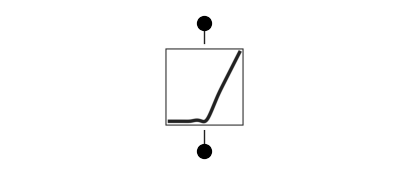

In [16]:
feature_model.KAN1.plot()

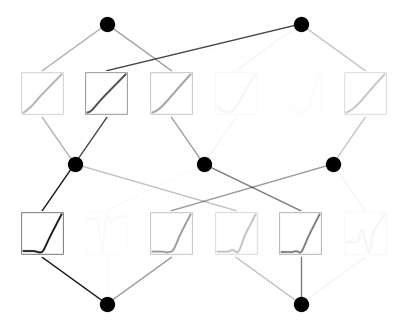

In [17]:
#feature_model.KAN = feature_model.KAN.prune()
feature_model.KAN.plot()

In [141]:
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.cls = feature_model.KAN_reaction
        @qml.qnode(dev, interface='torch')
        def QuantumLayer(features,params):
            for i in range(5):
                ZZFeatureMapLayer(features, wires=range(PCA_dim))
                ansatz(params[i])
            return qml.probs(wires=range(math.ceil(math.log2(CLS_num))))
        self.quantum_layer = QuantumLayer
        self.Q_params = nn.Parameter((torch.rand([5,PCA_dim,PCA_dim,2])*2-1)*np.pi,requires_grad=True)
    def forward(self, x):
        epsilon = 1e-6
        x = self.cls(x)
        #print(qml.draw(self.quantum_layer)(x,self.Q_params))
        quantum_output = self.quantum_layer(x,self.Q_params)
        quantum_output = quantum_output.type(torch.float32)
        return quantum_output[:,0].clamp(min=epsilon, max=1-epsilon)
model = HybridModel(); criterion = nn.BCELoss()
optimizer = optim.Adam([model.Q_params], lr=0.01)
from functions.training import Early_stop_train
train_process = Early_stop_train(model, optimizer, criterion)
train_process.train_model(train_loader,test_loader,epochs=25)

_,acc = train_process.test(test_loader)


Test set: Average loss: 2.0134, Accuracy: 82.00000005960464/133 (62%)
Epoch 1 Loss 0.675897 acc : 0.620873 stop count : 0
Test set: Average loss: 1.8967, Accuracy: 87.00000005960464/133 (65%)
Epoch 2 Loss 0.636764 acc : 0.731545 stop count : 0
Test set: Average loss: 1.8481, Accuracy: 92.0/133 (69%)
Epoch 3 Loss 0.615194 acc : 0.758491 stop count : 0
Test set: Average loss: 1.8212, Accuracy: 91.0/133 (68%)
Epoch 4 Loss 0.603542 acc : 0.765389 stop count : 0
Test set: Average loss: 1.8098, Accuracy: 91.0/133 (68%)
Epoch 5 Loss 0.592995 acc : 0.790389 stop count : 0
Test set: Average loss: 1.8213, Accuracy: 89.0/133 (67%)
Epoch 6 Loss 0.586422 acc : 0.769163 stop count : 1
Test set: Average loss: 1.7998, Accuracy: 91.0/133 (68%)
Epoch 7 Loss 0.579742 acc : 0.787264 stop count : 0
Test set: Average loss: 1.7916, Accuracy: 92.0/133 (69%)
Epoch 8 Loss 0.579748 acc : 0.784670 stop count : 0
Test set: Average loss: 1.7791, Accuracy: 90.0/133 (68%)
Epoch 9 Loss 0.573021 acc : 0.806663 stop co

In [118]:
def ZZFeatureMapLayer_fixed(features, wires):
    """사용자 정의 ZZFeatureMap 레이어"""
    index = 0
    for i in wires:
        qml.Hadamard(wires=i)
        qml.RZ(features[:,index], wires=i)
        index += 1
    index=0
    for j in range(0, len(wires)-1):
        qml.CNOT(wires=[j, j+1])
        qml.RZ((features[:,index])*(features[:,index+1]), wires=j+1)
        qml.CNOT(wires=[j, j+1])
        index+=1

In [149]:
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.cls = feature_model.KAN_reaction
        @qml.qnode(dev, interface='torch')
        def QuantumLayer(features,params):
            for i in range(5):
                ZZFeatureMapLayer_fixed(features, wires=range(PCA_dim))
                ansatz(params[i])
            return qml.probs(wires=range(math.ceil(math.log2(CLS_num))))
        self.quantum_layer = QuantumLayer
        self.Q_params = nn.Parameter((torch.rand([5,PCA_dim,PCA_dim,2])*2-1)*np.pi,requires_grad=True)
    def forward(self, x):
        epsilon = 1e-6
        #x = self.cls(x)
        #print(qml.draw(self.quantum_layer)(x,self.Q_params))
        quantum_output = self.quantum_layer(x,self.Q_params)
        quantum_output = quantum_output.type(torch.float32)
        return quantum_output[:,1].clamp(min=epsilon, max=1-epsilon)
model = HybridModel(); criterion = nn.BCELoss()
optimizer = optim.Adam([model.Q_params], lr=0.01)
from functions.training import Early_stop_train
train_process = Early_stop_train(model, optimizer, criterion)
train_process.train_model(train_loader,test_loader,epochs=25)

_,acc = train_process.test(test_loader)


Test set: Average loss: 2.1247, Accuracy: 64.00000001490116/133 (48%)
Epoch 1 Loss 0.702060 acc : 0.389583 stop count : 0
Test set: Average loss: 1.9923, Accuracy: 89.00000005960464/133 (67%)
Epoch 2 Loss 0.640876 acc : 0.796875 stop count : 0
Test set: Average loss: 1.8581, Accuracy: 105.0/133 (79%)
Epoch 3 Loss 0.601796 acc : 0.859375 stop count : 0
Test set: Average loss: 1.7631, Accuracy: 111.0/133 (83%)
Epoch 4 Loss 0.575146 acc : 0.890625 stop count : 0
Test set: Average loss: 1.6956, Accuracy: 114.0/133 (86%)
Epoch 5 Loss 0.555958 acc : 0.901042 stop count : 0
Test set: Average loss: 1.6448, Accuracy: 117.0/133 (88%)
Epoch 6 Loss 0.541319 acc : 0.916667 stop count : 0
Test set: Average loss: 1.6053, Accuracy: 117.0/133 (88%)
Epoch 7 Loss 0.529705 acc : 0.921875 stop count : 0

KeyboardInterrupt: 

In [12]:
fix_feature = Feature_model_fixed()

In [13]:
from functions.training import Kernal_method
fixed_kernal  = Kernal_method(fix_feature)
keranl = Kernal_method(feature_model)

In [14]:
fixed_kernal.train(x_train_pca, y_train,x_test_pca,y_test)

100%|██████████| 140/140 [00:13<00:00, 10.16it/s]
c:\Users\pop75\OneDrive\Desktop\Project\AI_quantum_project\Quantum_KAN_modif\functions\training.py:221: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train).float()
c:\Users\pop75\OneDrive\Desktop\Project\AI_quantum_project\Quantum_KAN_modif\functions\training.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test).float()
100%|██████████| 140/140 [00:08<00:00, 17.05it/s]

 acc :  0.6000000238418579


(tensor([[1.0000e+00, 1.8912e-03, 5.0535e-04,  ..., 1.2684e-03, 7.5125e-04,
          1.8131e-04],
         [1.8912e-03, 1.0000e+00, 7.6415e-05,  ..., 9.9448e-03, 8.1960e-03,
          1.3097e-03],
         [5.0535e-04, 7.6415e-05, 1.0000e+00,  ..., 9.0930e-03, 1.9711e-03,
          2.9987e-04],
         ...,
         [1.2684e-03, 9.9448e-03, 9.0930e-03,  ..., 1.0000e+00, 6.5076e-03,
          1.4271e-03],
         [7.5125e-04, 8.1960e-03, 1.9711e-03,  ..., 6.5076e-03, 1.0000e+00,
          1.1036e-03],
         [1.8131e-04, 1.3097e-03, 2.9987e-04,  ..., 1.4271e-03, 1.1036e-03,
          1.0000e+00]]),
 tensor([[1.5505e-03, 1.4807e-03, 5.3824e-04,  ..., 2.9100e-03, 1.6180e-02,
          3.8593e-03],
         [4.0501e-03, 1.8477e-03, 2.7761e-04,  ..., 1.7834e-04, 2.3242e-03,
          4.2579e-04],
         [7.5070e-04, 2.0937e-04, 1.4447e-03,  ..., 5.2230e-04, 6.8123e-04,
          4.6159e-04],
         ...,
         [1.1546e-03, 1.5077e-05, 1.7329e-04,  ..., 1.0888e-04, 5.1500e-03,
   

In [15]:
keranl.train(x_train_pca, y_train,x_test_pca,y_test)

100%|██████████| 140/140 [00:12<00:00, 11.46it/s]

 acc :  0.8166666626930237


(tensor([[1.0000e+00, 2.9079e-01, 3.2818e-04,  ..., 4.9283e-03, 4.5539e-03,
          2.2526e-03],
         [2.9079e-01, 1.0000e+00, 1.0359e-01,  ..., 1.5651e-02, 3.2630e-02,
          3.8122e-02],
         [3.2818e-04, 1.0359e-01, 1.0000e+00,  ..., 5.6618e-02, 1.4505e-01,
          2.6624e-01],
         ...,
         [4.9283e-03, 1.5651e-02, 5.6618e-02,  ..., 1.0000e+00, 6.5909e-03,
          6.3408e-03],
         [4.5539e-03, 3.2630e-02, 1.4505e-01,  ..., 6.5909e-03, 1.0000e+00,
          4.5919e-01],
         [2.2526e-03, 3.8122e-02, 2.6624e-01,  ..., 6.3408e-03, 4.5919e-01,
          1.0000e+00]]),
 tensor([[1.7328e-01, 5.8218e-01, 4.4450e-03,  ..., 2.5288e-02, 3.5210e-04,
          1.7879e-03],
         [4.1552e-03, 1.6051e-02, 1.1078e-01,  ..., 1.0602e-01, 1.7650e-01,
          7.3827e-02],
         [5.1204e-04, 1.0565e-01, 9.1702e-01,  ..., 3.9144e-02, 3.6351e-01,
          4.1598e-01],
         ...,
         [2.1033e-01, 9.1527e-01, 1.7932e-01,  ..., 5.0263e-03, 1.1392e-01,
   